In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay

In [26]:
def plot_1d_subplots(u,r,v, delta_v,delta,n):
    if n == 0:
        tr = 'before training'
    else:
        tr = 'after training'
    fig, axes = plt.subplots(5, 1, figsize=(8, 10))
    plt.suptitle(tr)

    for i, data in enumerate([u,r,v, delta_v,delta]):
        axes[i].plot(data)
        axes[i].set_xlabel('t')
        axes[i].set_ylabel(['u','r','v',r'$\Delta$ v',r'$\delta$'][i])
        axes[i].set_ylim(min(data)-0.1, max(data)+0.1)
        axes[i].set_xticks(np.arange(0, T, step=100))
        axes[i].set_yticks(np.arange(-1, 2.2, step=1))

    plt.subplots_adjust(hspace=0.5)
    plt.savefig(f"plot_{tr}.png")
    plt.show()



In [27]:


def plot_smooth_surface(delta_values, T, trials):
    fig = plt.figure(figsize=(6, 12))
    ax = fig.add_subplot(111, projection='3d')
    time_axis, trials_axis = np.meshgrid(np.arange(T), np.arange(trials))
    points = np.column_stack((time_axis.flatten(), trials_axis.flatten(), delta_values.flatten()))
    tri = Delaunay(points[:, :2])
    surf = ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles=tri.simplices)
    for i in range(0, T, 10):
        ax.plot(np.ones(trials) * i, np.arange(trials), delta_values[:, i], color='black', linewidth=0.5)

    for j in range(0, trials, 10):
        ax.plot(np.arange(T), np.ones(T) * j, delta_values[j, :], color='black', linewidth=0.5)

    ax.set_xlabel('Time')
    ax.set_ylabel('Trials')
    ax.set_zlabel(r'$\delta$')

    ax.set_xticks(np.arange(0, T, step=100))
    ax.set_yticks(np.arange(0, trials, step=100))
    ax.set_zticks(np.arange(0, 2.2, step=1))

    ax.view_init(15, -70)
    plt.tight_layout(rect=[0, 0, 1, 1])
    ax.set_zlim(0, 2.2)
    plt.savefig("3D_plot_smooth.png")
    plt.title('A')
    plt.show()




In [28]:
def plot_3d_surface(delta_values, T, trials):
    fig = plt.figure(figsize=(6, 12))
    ax = fig.add_subplot(111, projection='3d')

    time_axis, trials_axis = np.meshgrid(np.arange(T), np.arange(trials))

    ax.plot_surface(time_axis, trials_axis, delta_values, cmap='gray',
                    edgecolor='black', linewidth=0.1)

    ax.set_xlabel('Time')
    ax.set_ylabel('Trials')
    ax.set_zlabel(r'$\delta$')

    ax.set_yticks(np.arange(0, trials, step=50))

    plt.tight_layout(rect=[0, 0, 1, 1])
    ax.view_init(30, -60)
    ax.set_zlim(0, 2.2)

    plt.title('A')
    plt.savefig("3D_plot.png")
    plt.show()

In [29]:
def simulate_and_plot(trials, T):
    delta_values = np.zeros((trials, T))
    weights = np.zeros((trials, T))

    for n in range(trials):
        reward = r

        v = np.zeros((T))

        for t in range(T):
            for tau in range(t):
                v[t] = v[t] + (w[tau] * u[t - tau])
        for t in range(T - 1):
            delta_v[t] = v[t + 1] - v[t]
            delta[t] = reward[t] + v[t + 1] - v[t]

        delta_values[n, :] = delta
        
        for t in range(T):
            for tau in range(t):
                w[tau] = w[tau] + e * delta[t] * u[t - tau]
        weights[n, :] = w

        if n == 0 or n == trials - 1:
            plot_1d_subplots(u,r,v, delta_v,delta,n)

    plot_3d_surface(delta_values, T, trials)
    plot_smooth_surface(delta_values, T, trials)
    #plt.plot(weights)

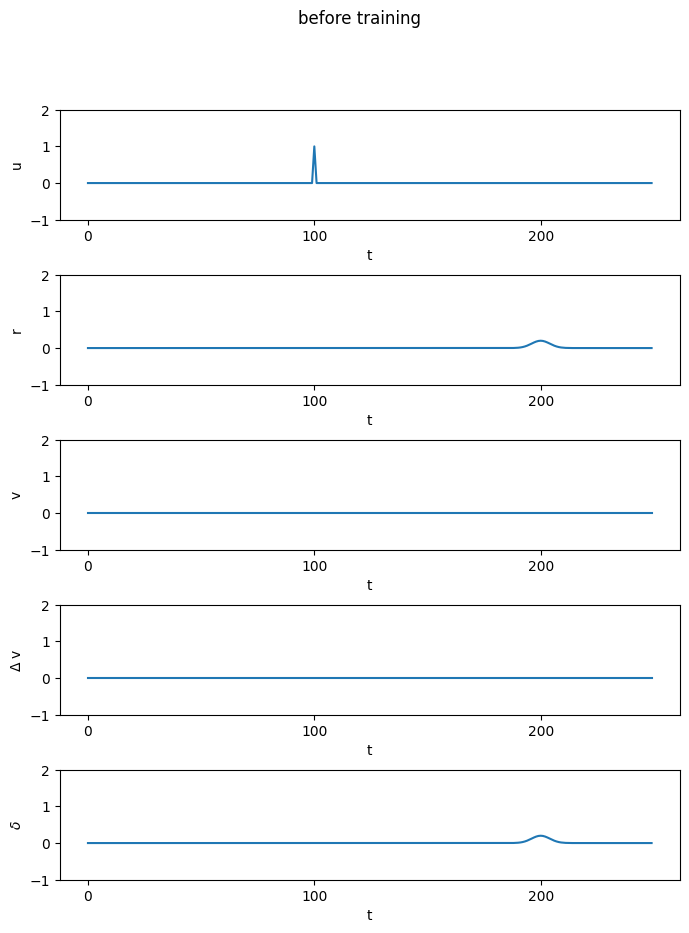

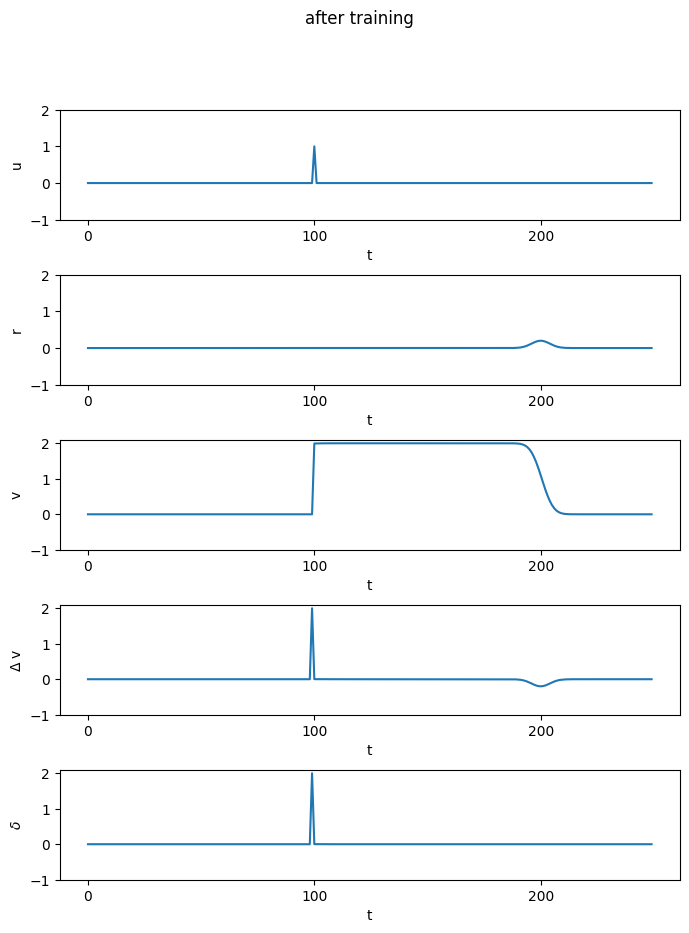

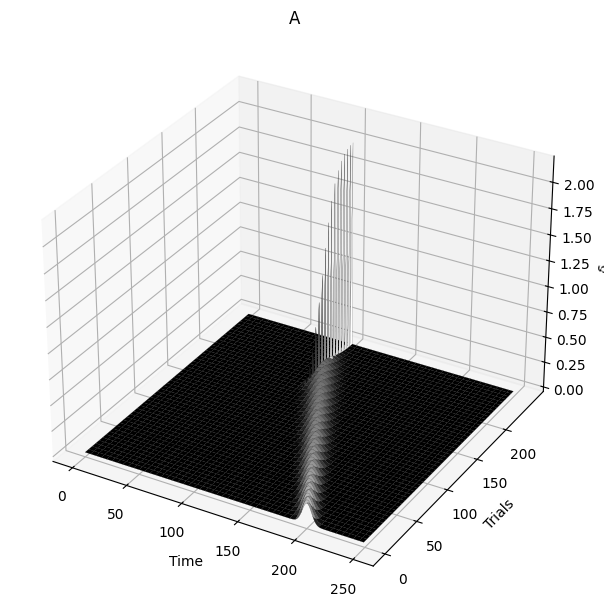

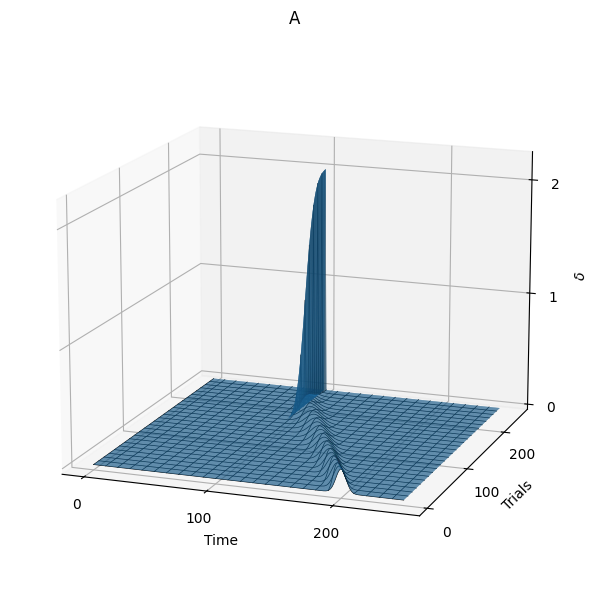

In [30]:
T = 250
delta = np.zeros((T))
delta_v = np.zeros((T))
v = np.zeros((T))
trials = 250
w = np.zeros((T))
r = np.zeros((T))
u = np.zeros((T))

total_reward = 0.2
peak_position = 200
bump_width = 4
scaling_factor = total_reward / norm.pdf(peak_position, loc=peak_position, scale=bump_width)
r = scaling_factor * norm.pdf(np.arange(T), loc=peak_position, scale=bump_width)

u[100] = 1
e = 0.5

simulate_and_plot(trials, T)